In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers 
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive'

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
ds = tf.keras.preprocessing.image_dataset_from_directory("project",shuffle=True,image_size=(256,256),batch_size=32)

Found 635 files belonging to 6 classes.


In [ ]:
len(ds)

20

In [ ]:
classes = ds.class_names
classes


['accident',
 'animal_cruelty',
 'crowding',
 'explosion',
 'fight',
 'weapon_usage']

(256, 256, 3)


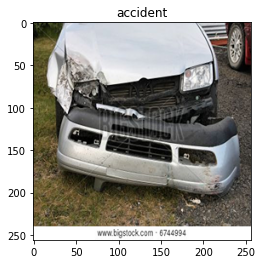

In [ ]:
for i,j in ds.take(1):
    plt.imshow(i[0].numpy().astype(int))
    plt.title(classes[j[0]])
    print(i[0].numpy().shape)

In [ ]:
train=ds.take(16)
tes=ds.skip(16)
test=tes.take(2)
vali=tes.skip(2)
print(len(train) , len(test) , len(vali))

16 2 2


In [ ]:
train = train.cache().prefetch(buffer_size=2).shuffle(10)
vali = vali.cache().prefetch(buffer_size=2).shuffle(10)
test = test.cache().prefetch(buffer_size=2).shuffle(10)

In [ ]:
prepro = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
inpu = (32,256,256,3)
model = models.Sequential([
    prepro,
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=inpu),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(6,activation="softmax")
])

model.build(input_shape=inpu)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(train,batch_size=32,validation_data=vali,epochs=10,verbose=1)

Epoch 1/10
16/16 [==============================] - 71s 4s/step - loss: 0.0226 - accuracy: 0.9961 - val_loss: 0.5427 - val_accuracy: 0.8983
Epoch 2/10
16/16 [==============================] - 72s 4s/step - loss: 0.0143 - accuracy: 0.9961 - val_loss: 0.4920 - val_accuracy: 0.9322
Epoch 3/10
16/16 [==============================] - 71s 4s/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.6232 - val_accuracy: 0.9322
Epoch 4/10
16/16 [==============================] - 71s 4s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.6771 - val_accuracy: 0.9153
Epoch 5/10
16/16 [==============================] - 71s 5s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.6106 - val_accuracy: 0.9153
Epoch 6/10
16/16 [==============================] - 71s 4s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.6408 - val_accuracy: 0.8983
Epoch 7/10
16/16 [==============================] - 73s 5s/step - loss: 6.8284e-04 - accuracy: 1.0000 - val_loss: 0.6830 - val_accuracy: 0.8983
Epoch 8/10
16/16

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)       

In [ ]:
model.save("unsus_keras.h5")

In [ ]:
model.save("unsus_keras.pb")

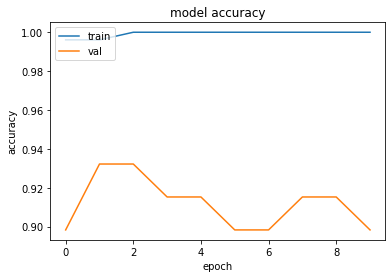

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(test)

2/2 [==============================] - 5s 1s/step - loss: 0.9275 - accuracy: 0.9375


[0.927470326423645, 0.9375]